In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [2]:
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/raw_waveforms'

ch = '37'
runs = [25050, 25068, 25071]
pns = []
for run in runs:
    with open(f'{peak_folder}/waveforms_{run}ch{ch}_PNS_wlenNone_prom500.pkl', 'rb') as file:
        pns.append(pickle.load(file))
with open(f'{peak_folder}/waveforms_25087ch37_cosmics_wlenNone_prom500.pkl', 'rb') as file:
    mu = pickle.load(file)


In [4]:
pns[0].keys()

dict_keys(['peak_indices_2d', 'peak_heights', 'properties', 'waveforms', 'flat_peak_indices', 'pedestals'])

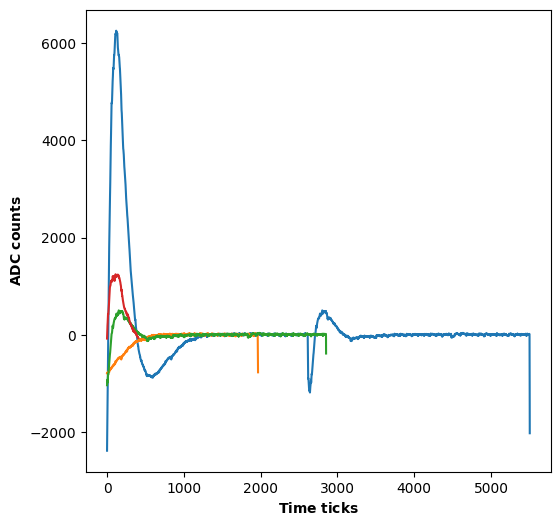

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

p = 0 

nTirggerRecords = 50 #len(res['waveforms'])

for trigger_idx in range(0, nTirggerRecords):
    trigger_record = pns[p]['waveforms'][trigger_idx]
    for i in np.arange(0, len(trigger_record), 1):
            ax.plot(trigger_record[i].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");


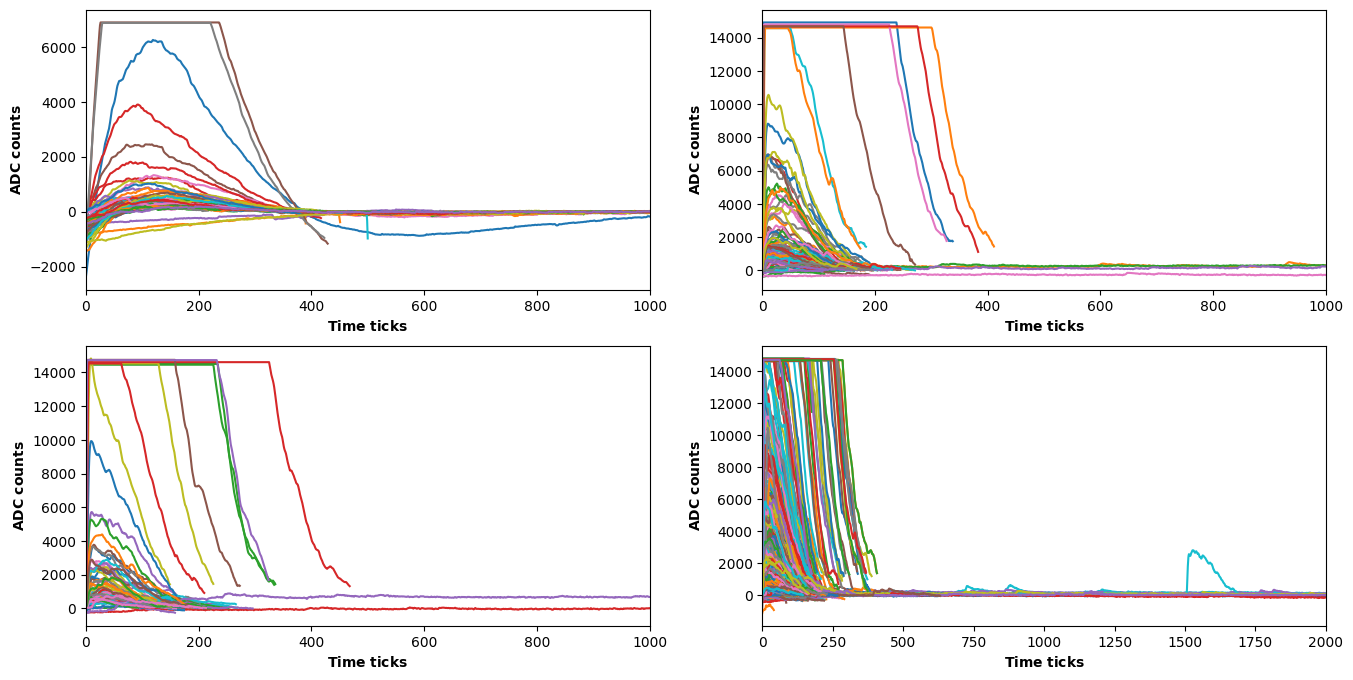

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
nTirggerRecords = 1000 #len(res['waveforms'])
for p in range(0, 3):
    ax = axs.flatten()[j]
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = pns[p]['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
                ax.plot(trigger_record[i].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    j+=1
    ax.set_xlim(0, 1000);


ax = axs.flatten()[3]
for trigger_idx in range(0, nTirggerRecords):
    trigger_record = mu['waveforms'][trigger_idx]
    for i in np.arange(0, len(trigger_record), 1):
            ax.plot(trigger_record[i].transpose())
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_xlim(0, 2000);


In [18]:
print('Find ADC saturation threshold ')
dict = mu#pns[2]
maximum = 0
for trigger_idx in range(0, len(dict['peak_heights'])):
    peak_heights_rec = dict['peak_heights'][trigger_idx]
    if len(peak_heights_rec)<1:
        continue
    if peak_heights_rec.max()>maximum: 
        maximum = peak_heights_rec.max()
print(maximum)

Find ADC saturation threshold 
15108


# Selected waveforms

In [32]:
def pad_waveforms(input_data, pad_length=500):
    output_data = input_data
    output_data['waveform_padded'] = [np.pad(wf, (0, pad_length - len(wf))) if len(wf) < pad_length else wf[:pad_length] for wf in output_data['waveform']]
    return output_data

In [33]:
import pandas as pd
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/selected_waveforms'

sel = []
for f in [
    'selection_25050ch37_PNS_wlenNone_prom500.pkl',
    'selection_25068ch37_PNS_wlenNone_prom500.pkl',
    'selection_25071ch37_PNS_wlenNone_prom500.pkl',
    'selection_25087ch37_cosmics_wlenNone_prom500.pkl'
    ]:
    with open(f'{peak_folder}/{f}', 'rb') as file:
        dic = pickle.load(file)
    d = pd.DataFrame(dic)
    df = pad_waveforms(d, pad_length=500)
    sel.append(pd.DataFrame(df))
for df in sel:
    print(f"df:  {df.shape} peaks, {df.trigger_record.unique().shape[0]} trigger records")


df:  (0, 7) peaks, 0 trigger records
df:  (564, 7) peaks, 154 trigger records
df:  (2960, 7) peaks, 993 trigger records
df:  (3516, 7) peaks, 329 trigger records


In [34]:
sel[1].head()

,trigger_record,waveform_index,height,width,pedestal,waveform,waveform_padded
0,0,0,821,166.655375,1476,"[129, 193, 261, 317, 370, 408, 437, 448, 456, ...","[129, 193, 261, 317, 370, 408, 437, 448, 456, ..."
1,0,1,6882,144.342127,1476,"[168, 605, 1560, 2753, 3859, 4873, 5709, 6203,...","[168, 605, 1560, 2753, 3859, 4873, 5709, 6203,..."
2,0,2,886,165.366667,1476,"[153, 161, 158, 207, 287, 377, 461, 524, 541, ...","[153, 161, 158, 207, 287, 377, 461, 524, 541, ..."
3,1,0,1863,186.026667,1838,"[110, 365, 725, 1087, 1378, 1585, 1722, 1813, ...","[110, 365, 725, 1087, 1378, 1585, 1722, 1813, ..."
4,1,1,582,221.357576,1838,"[-32, -10, -7, 12, 57, 128, 206, 280, 341, 387...","[-32, -10, -7, 12, 57, 128, 206, 280, 341, 387..."


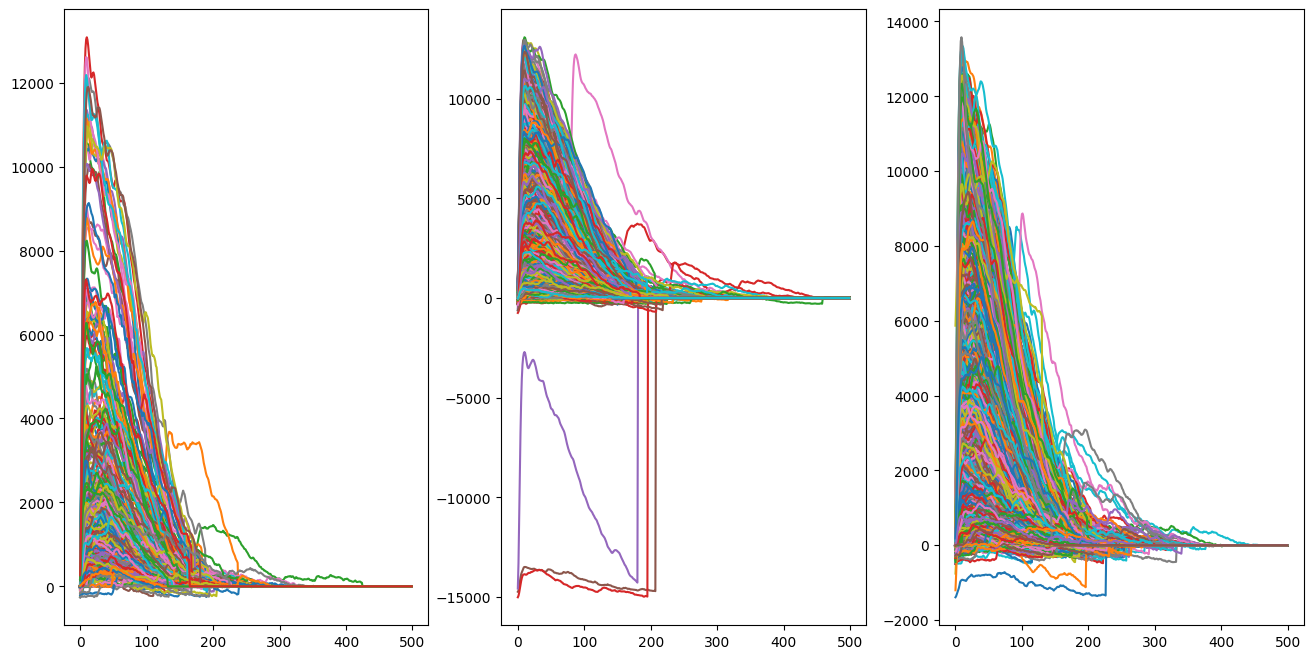

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
j=0
for i in range(1, 4):
    ax = axs.flatten()[j]
    for wf in sel[i]['waveform_padded']:
        ax.plot(wf)
    j+=1


In [37]:
# threshold = 0
# mu_avg = np.mean(cosmics.query(f'height>{threshold}')['waveform_padded'], axis=0)
# n_avg = np.mean(PNS_neutrons.query(f'height>{threshold}')['waveform_padded'], axis=0)
# sb_avg = np.mean(PNS_SB.query(f'height>{threshold}')['waveform_padded'], axis=0)

avgs = []
for df in sel:
    avgs.append(  np.mean(df['waveform_padded'], axis=0) )


In [42]:
sel[1].head()

,trigger_record,waveform_index,height,width,pedestal,waveform,waveform_padded
0,0,0,821,166.655375,1476,"[129, 193, 261, 317, 370, 408, 437, 448, 456, ...","[129, 193, 261, 317, 370, 408, 437, 448, 456, ..."
1,0,1,6882,144.342127,1476,"[168, 605, 1560, 2753, 3859, 4873, 5709, 6203,...","[168, 605, 1560, 2753, 3859, 4873, 5709, 6203,..."
2,0,2,886,165.366667,1476,"[153, 161, 158, 207, 287, 377, 461, 524, 541, ...","[153, 161, 158, 207, 287, 377, 461, 524, 541, ..."
3,1,0,1863,186.026667,1838,"[110, 365, 725, 1087, 1378, 1585, 1722, 1813, ...","[110, 365, 725, 1087, 1378, 1585, 1722, 1813, ..."
4,1,1,582,221.357576,1838,"[-32, -10, -7, 12, 57, 128, 206, 280, 341, 387...","[-32, -10, -7, 12, 57, 128, 206, 280, 341, 387..."


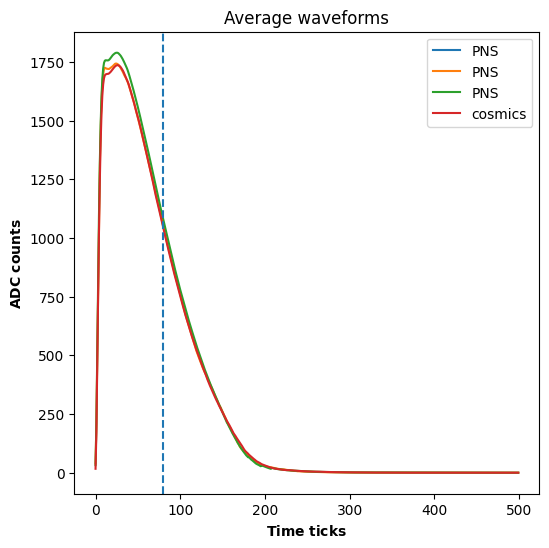

In [41]:
rg = None
# rg = (0e6, 0.5e6)
den = True
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for avg in avgs[:-1]:
    ax.plot(avg, label='PNS') 
ax.plot(avgs[-1], label='cosmics')
ax.axvline(x = 80, linestyle='--')
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"Average waveforms");
ax.legend();

In [53]:
def promptFrac(waveforms, promptLim, Start=0):
    ratio, TotalIntegral, promptInt = [], [], []
    for wf in waveforms:
        tot_int = np.sum(wf[Start:])
        pf = np.sum(wf[Start:promptLim])

        ratio.append( pf/tot_int )
        TotalIntegral.append( tot_int )
        promptInt.append( pf )
    return np.array(ratio), np.array(TotalIntegral), np.array(promptInt)
     

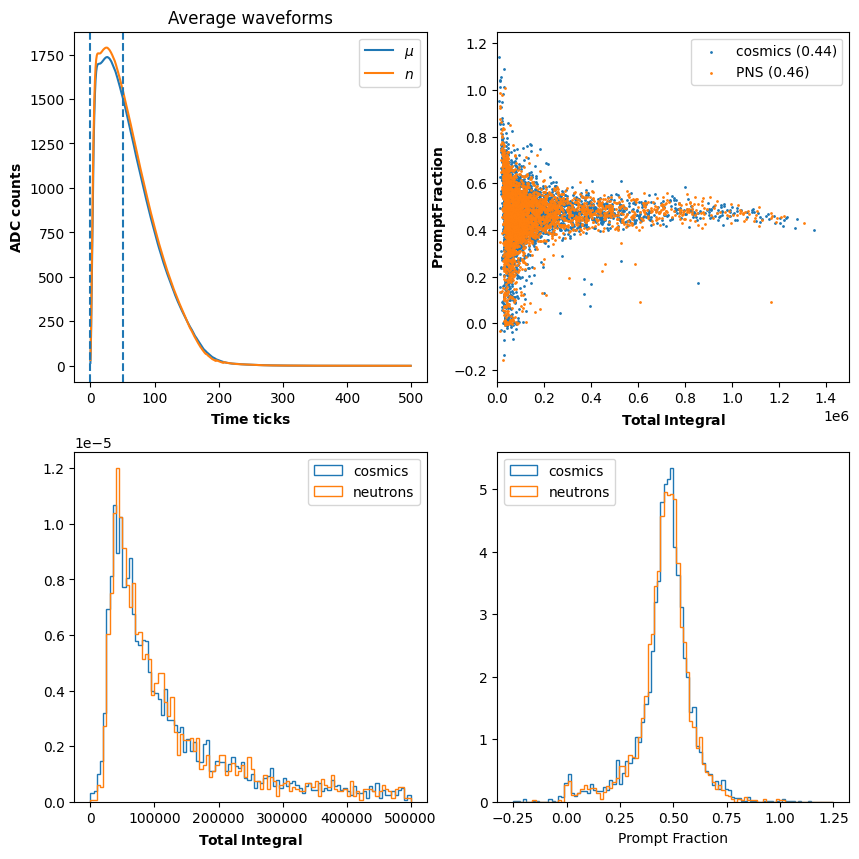

In [60]:
lim = 50
start = 0

PF_cr, tot_cr, P_cr = promptFrac(np.stack(sel[3]['waveform_padded'].values), lim, start)
PF_n, tot_n, P_n    = promptFrac(np.stack(sel[2]['waveform_padded'].values), lim, start)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

ax = axs.flatten()[0]
ax.plot(avgs[3].transpose(), label = r'$\mu$') 
ax.plot(avgs[2].transpose(), label = r'$n$') 
ax.axvline(x = start, linestyle='--')
ax.axvline(x = lim, linestyle='--')
ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
ax.set_title(r"Average waveforms");
ax.legend();

ax = axs.flatten()[1]
ax.scatter(tot_cr, PF_cr,  s=1, label=f'cosmics ({PF_cr.mean():.2f})')
ax.scatter(tot_n, PF_n,  s=1, label=f'PNS ({PF_n.mean():.2f})')
ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
ax.set_ylabel(r"$\mathrm{\bf Prompt Fraction}$");
ax.set_ylim(-0.25, 1.25);
ax.set_xlim(0, 1.5e6);
ax.legend();


ax = axs.flatten()[2]
rg = (0, 500000)
ax.hist(tot_cr, bins = 100, label=f'cosmics', density=True, histtype='step', range=rg)
ax.hist(tot_n,  bins = 100, label=f'neutrons', density=True, histtype='step', range=rg)
ax.set_xlabel(r"$\mathrm{\bf Total \, Integral}$")
ax.legend();

ax = axs.flatten()[3]
rg = (-0.25, 1.25)
ax.hist(PF_cr, bins = 100, label=f'cosmics', density=True, histtype='step', range=rg)
ax.hist(PF_n,  bins = 100, label=f'neutrons', density=True, histtype='step', range=rg)
ax.set_xlabel(r"Prompt Fraction")
ax.legend(loc='upper left');
